In [4]:
library(ggplot2)
library(foreign)

#### Fungsi untuk membuat multiplot dengan ggplot2: <br> require: ggplot2

In [3]:
# Multiple plot (ggplot2) function
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)
  
  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)
  
  numPlots = length(plots)
  
  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                     ncol = cols, nrow = ceiling(numPlots/cols))
  }
  
  if (numPlots==1) {
    print(plots[[1]])
    
  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))
    
    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))
      
      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

In [5]:
hsb <- read.dta("hsbdemo.dta")

In [6]:
head(hsb)

id,female,ses,schtyp,prog,read,write,math,science,socst,honors,awards,cid
45,female,low,public,vocation,34,35,41,29,26,not enrolled,0,1
108,male,middle,public,general,34,33,41,36,36,not enrolled,0,1
15,male,high,public,vocation,39,39,44,26,42,not enrolled,0,1
67,male,low,public,vocation,37,37,42,33,32,not enrolled,0,1
153,male,middle,public,vocation,39,31,40,39,51,not enrolled,0,1
51,female,high,public,general,42,36,42,31,39,not enrolled,0,1


In [12]:
hsb_df <- data.frame(hsb)

In [13]:
numerik <- sapply(hsb_df,class)=="numeric"
faktor <- sapply(hsb_df,class)=="factor"

In [18]:
attach(hsb_df)

In [19]:
numerik_terpilih <- c(names(hsb_df)=="science" | names(hsb_df)=="socst")
atribut <- c(names(hsb_df)=="science" | names(hsb_df)=="socst" | names(hsb_df)=="prog")

In [20]:
p1 <- ggplot(hsb_df, aes(x=prog,y=science,fill=prog))+ geom_boxplot()
p2 <- ggplot(hsb_df, aes(x=prog,y=socst,fill=prog))+ geom_boxplot()
p3 <- ggplot(hsb_df, aes(x=science,fill=prog))+geom_histogram(binwidth = 3)
p4 <- ggplot(hsb_df, aes(x=socst,fill=prog))+geom_histogram(binwidth = 3)

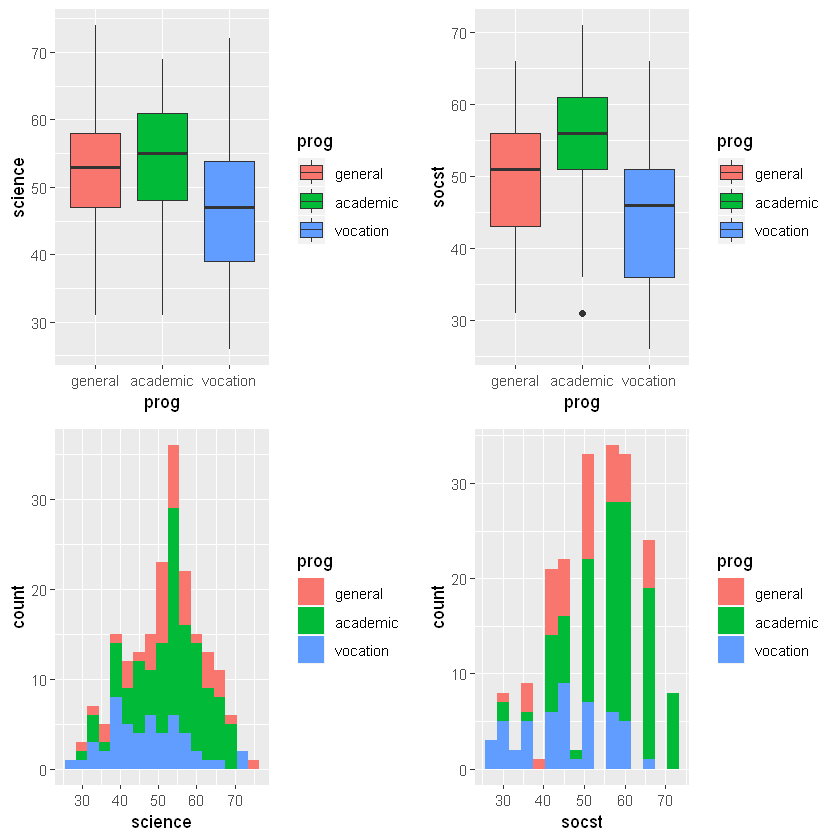

In [21]:
multiplot(p1,p3,p2,p4,cols=2)

### Credit: <br> Thanks to knitr and Jkyll <br> http://www.cookbook-r.com/Graphs/Multiple_graphs_on_one_page_(ggplot2)/